In [6]:
import os
os.getcwd()

'/home/lukas/git/dnam2/bert'

## This is for training the model

In [2]:
from omegaconf import OmegaConf as om
from omegaconf import DictConfig
from typing import cast
from main import main

yaml_path = "yamls/pretrain/micro_dna_monarch-mixer-pretrain-786dim-80m-parameters.yaml"

with open(yaml_path) as f:
    cfg = om.load(f)
cfg = cast(DictConfig, cfg)
print(cfg.max_duration)
#main(cfg)
trainer, model = main(cfg, True, False)

Could not import FlashFFTConv!
20000ba
Training using config: 
data_local: ./microset/
data_remote: null
max_seq_len: 512
tokenizer_name: gagneurlab/SpeciesLM
mlm_probability: 0.02
run_name: mirco_dna_monarch-mixer-pretrain-786dim-80m-parameters2
model:
  name: bert
  pretrained_model_name: bert-base-uncased
  tokenizer_name: ${tokenizer_name}
  model_config:
    num_attention_heads: 12
    num_hidden_layers: 12
    attention_probs_dropout_prob: 0.0
    max_position_embeddings: ${max_seq_len}
    monarch_mixer_sequence_mixing: true
    long_conv_l_max: ${max_seq_len}
    long_conv_kernel_learning_rate: 0.001
    hyena_lr_pos_emb: 1.0e-05
    hyena_w: 10
    hyena_wd: 0.1
    hyena_emb_dim: 5
    hyena_filter_order: 128
    bidirectional: true
    residual_long_conv: true
    use_glu_mlp: true
    use_monarch_mlp: true
    monarch_mlp_nblocks: 4
    use_positional_encodings: true
train_loader:
  name: dna
  dataset:
    local: ${data_local}
    remote: null
    split: train
    tokenize

/opt/modules/i12g/anaconda/envs/m2-mixer/lib/python3.9/site-packages/composer/callbacks/speed_monitor.py:120: UserWarning: gpu_flop count not found for None with precision: fp32; MFU cannot be calculated and reported. gpu_flops_available can be manuallyoverridden by setting gpu_flops_available in SpeedMonitor.
  warnings.warn(


Logging config...
data_local: ./microset/
data_remote: null
max_seq_len: 512
tokenizer_name: gagneurlab/SpeciesLM
mlm_probability: 0.02
run_name: mirco_dna_monarch-mixer-pretrain-786dim-80m-parameters2
model:
  name: bert
  pretrained_model_name: bert-base-uncased
  tokenizer_name: ${tokenizer_name}
  model_config:
    num_attention_heads: 12
    num_hidden_layers: 12
    attention_probs_dropout_prob: 0.0
    max_position_embeddings: ${max_seq_len}
    monarch_mixer_sequence_mixing: true
    long_conv_l_max: ${max_seq_len}
    long_conv_kernel_learning_rate: 0.001
    hyena_lr_pos_emb: 1.0e-05
    hyena_w: 10
    hyena_wd: 0.1
    hyena_emb_dim: 5
    hyena_filter_order: 128
    bidirectional: true
    residual_long_conv: true
    use_glu_mlp: true
    use_monarch_mlp: true
    monarch_mlp_nblocks: 4
    use_positional_encodings: true
train_loader:
  name: dna
  dataset:
    local: ${data_local}
    remote: null
    split: train
    tokenizer_name: ${tokenizer_name}
    max_seq_len: ${

In [16]:
from dna_data import build_dna_dataloader
import numpy as np
import torch
loaderCfg = cfg.train_loader
dataloader = build_dna_dataloader(loaderCfg, 1)

sample = next(iter(dataloader))
sample = {key: value.to('cuda:0') for key, value in sample.items()}
outputs = model(sample)
outputs.logits.shape

==Using the correct data collator


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


torch.Size([1, 300, 30528])

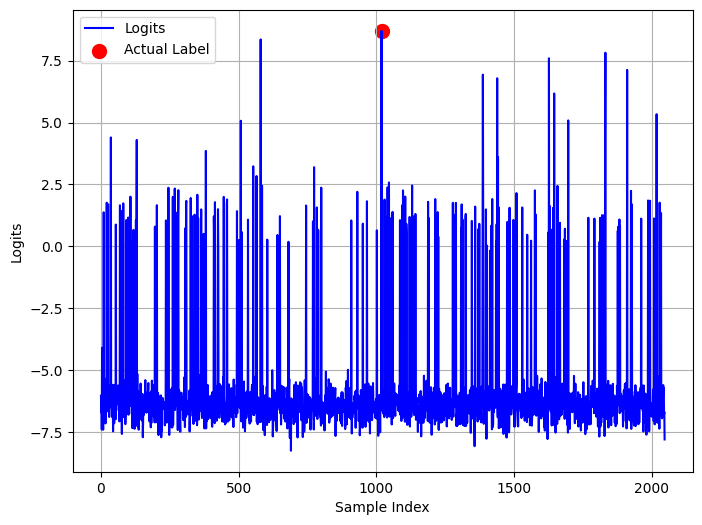

In [90]:
import matplotlib.pyplot as plt
def vis_logits(index, outputs):
    logits = outputs.logits[:,index,:2048].cpu().detach().numpy()[0]
    actual_label = sample['labels'][0][index].cpu().detach().numpy()

    # Plot the logits
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(logits)), logits, label='Logits', color='blue')
    #plt.bar(range(len(logits)), logits)
    # Mark the actual label
    plt.scatter(actual_label, logits[actual_label], color='red', label='Actual Label', s=100)

    # Add labels and title
    plt.xlabel('Sample Index')
    plt.ylabel('Logits')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

vis_logits(242, outputs)

In [88]:

print(get_pos_of_vale(4062))
sample['labels']

tensor([243], device='cuda:0')


tensor([[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         1130,  411, 1630, 2412, 1442, 1658, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, 3851, 3102,  107,  414, 1642, 2458, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, 1498, 1882, 3418, 1371, 1374, 1388, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, 2057,   21,   69,  261,
         1030,   10, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -